In [213]:
import pandas as pd
import seaborn as sns

In [214]:
train_file = pd.read_csv('train_file.csv')

In [215]:
train_file.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [216]:
#print the shape of the train_file
train_file.shape

(614, 13)

In [217]:
#print the information of the train_file
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are so many rows with null values out of the total count of 614.

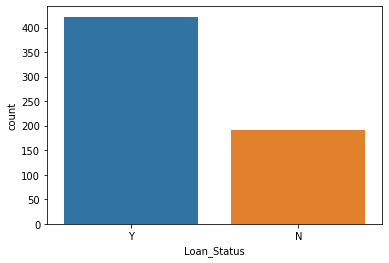

In [218]:
#let's display the loan status count
sns.countplot(train_file['Loan_Status'])

The dataset is heavily imbalanced with 'N' having fewer records when compare to 'Y'

In [219]:
#descriptive analysis of the dataset
train_file.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [220]:
train_file.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [221]:
#we can use replace option to convert the categorical variables into numbers
train_file['Gender'] = train_file['Gender'].replace({'Male':0, 'Female':1})
train_file['Married'] = train_file['Married'].replace({'No':0, 'Yes':1})
train_file['Dependents'] = train_file['Dependents'].replace({'0':0, '1':1, '2':2 , '3+':3})
train_file['Education'] = train_file['Education'].replace({'Graduate':0, 'Not Graduate':1})
train_file['Self_Employed'] = train_file['Self_Employed'].replace({'No':0, 'Yes':1})
train_file['Property_Area'] = train_file['Property_Area'].replace({'Urban':0, 'Rural':1, 'Semiurban':2})
train_file['Loan_Status'] = train_file['Loan_Status'].replace({'Y':0, 'N':1})

In [222]:
full_index = train_file.index
nonnull_index = train_file.dropna(axis=0).index

In [223]:
null_index = []
for i in full_index:
    if i not in nonnull_index:
        null_index.append(i)

In [224]:
train_nonnull = train_file.loc[nonnull_index]
train_null = train_file.loc[null_index]

In [225]:
train_null.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,0,0
11,LP001027,0.0,1.0,2.0,0,NaN,2500,1840.0,109.0,360.0,1.0,0,0
16,LP001034,0.0,0.0,1.0,1,0.0,3596,0.0,100.0,240.0,NaN,0,0
19,LP001041,0.0,1.0,0.0,0,NaN,2600,3500.0,115.0,NaN,1.0,0,0
23,LP001050,NaN,1.0,2.0,1,0.0,3365,1917.0,112.0,360.0,0.0,1,1


In [226]:
train_nonnull.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,0.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,0.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,0.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,0,0
5,LP001011,0.0,1.0,2.0,0,1.0,5417,4196.0,267.0,360.0,1.0,0,0


In [227]:
X = train_nonnull.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_nonnull['Loan_Status']

In [228]:
X1 = train_null.drop(['Loan_ID', 'Loan_Status'], axis=1)
y1 = train_null['Loan_Status']

## Upsampling using SMOTE

In [229]:
#import imblearn library
from imblearn.over_sampling import SMOTENC

oversample = SMOTENC(categorical_features=[0,1,2,3,4,9,10], random_state = 100)
X, y = oversample.fit_resample(X, y)

In [230]:
train_nonnull_final = pd.DataFrame(X)
train_nonnull_final['Loan_Status'] = y

In [231]:
train_null_final = pd.DataFrame(X1)
train_null_final['Loan_Status'] = y1

In [232]:
train_file_final = pd.concat([train_null_final, train_nonnull_final])

In [233]:
train_file_final.shape

(798, 12)

In [234]:
train_file_final.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,0,0
11,0.0,1.0,2.0,0,NaN,2500,1840.0,109.0,360.0,1.0,0,0
16,0.0,0.0,1.0,1,0.0,3596,0.0,100.0,240.0,NaN,0,0
19,0.0,1.0,0.0,0,NaN,2600,3500.0,115.0,NaN,1.0,0,0
23,NaN,1.0,2.0,1,0.0,3365,1917.0,112.0,360.0,0.0,1,1


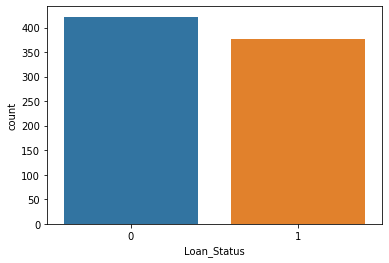

In [235]:
#now plot the count plot for the loan_status
#let's display the loan status count
sns.countplot(train_file_final['Loan_Status'])

As we can see the dataset is almost balanced. The minimal difference in the count here is because of the null values. 

## Upsampling using resampling

In [236]:
X = train_nonnull.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_nonnull['Loan_Status']

X1 = train_null.drop(['Loan_ID', 'Loan_Status'], axis=1)
y1 = train_null['Loan_Status']

In [237]:
y.value_counts()

0    332
1    148
Name: Loan_Status, dtype: int64

As we can see we need to increase the count of value '1' to 332

In [238]:
from sklearn.utils import resample

maxcount = 332

train_nonnull_resampled = train_nonnull[0:0]

for grp in train_nonnull['Loan_Status'].unique():
    GrpDF = train_nonnull[train_nonnull['Loan_Status'] == grp]
    resampled = resample(GrpDF, replace=True, n_samples=int(maxcount), random_state=123)
    train_nonnull_resampled = train_nonnull_resampled.append(resampled)

In [239]:
train_file_final = pd.concat([train_null_final, train_nonnull_resampled])

In [240]:
train_file_final.shape

(798, 13)

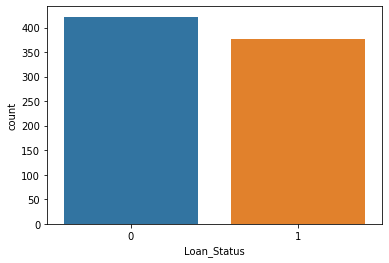

In [241]:
#now plot the count plot for the loan_status
#let's display the loan status count
sns.countplot(train_file_final['Loan_Status'])

## Downsampling using T-Links

In [242]:
X = train_nonnull.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_nonnull['Loan_Status']

X1 = train_null.drop(['Loan_ID', 'Loan_Status'], axis=1)
y1 = train_null['Loan_Status']

In [243]:
from imblearn.under_sampling import TomekLinks

undersample = TomekLinks()
X, y  = undersample.fit_resample(X, y)

In [244]:
train_nonnull_final = pd.DataFrame(X)
train_nonnull_final['Loan_Status'] = y

train_null_final = pd.DataFrame(X1)
train_null_final['Loan_Status'] = y1

train_file_final = pd.concat([train_null_final, train_nonnull_final])

train_file_final.shape

(561, 12)

The overall count has been reduced.